In [13]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


All the functions that I've used:

In [27]:
#f(x) Function for the first 2 exercises
class poly:
    def __init__(self) -> None:
        pass

    def f(x):
        return x**3+2*x**2+10*x-20
    def f_d(x):
        return 3*x**2+4*x+10 

In [28]:
#g(x) Function for Exercise 4
class poly2:
    def __init__(self) -> None:
        pass

    def g(x):
        return 20/(x**2+2*x+10)
    def g_d(x):
        return -40*(x+1)/(x**2+2*x+10)**2
    def g_d_d(x):
        return 120*(x**2+2*x-2)/(x**2+2*x+10)**3

In [31]:
#Tanh(x) function

class Tanh:
    def f(x):
        return np.tanh(x)
    def f_d(x):
        tanh = np.tanh(x)
        return 1-tanh**2

Exercise 1 and 2

2a)

There exists a solution as:

f(1) = -7

f(2) = 16

f(1) * f(2) = -112

as the function is continuous, there must exist a f(#) = 0, on the interval [1,2].

We know, that this is the only one, as the function is a polynom, which is strictly monotonic. This can be determined by ploting it.

In [40]:
f = poly
print("f(1):")
print(f.f(1))
print("f(2):")
print(f.f(2)) 
print("f(1)* f(2):")
print(f.f(1) * f.f(2))

f(1):
-7
f(2):
16
f(1)* f(2):
-112


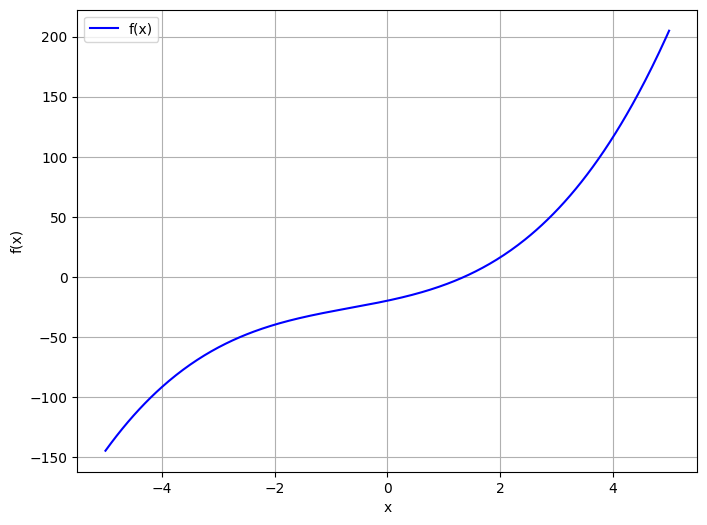

In [41]:
def plot_function():

    x = np.linspace(-5, 5, 400) 

    y = x**3 + 2*x**2 + 10*x - 20

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='f(x)', color='b')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    plt.grid(True)
    plt.legend()
    
    plt.show()

plot_function()


Bisection Method:

In [33]:
def Bisection_Method(func,lsp,rsp,precision,iter_):
    #This is where you generate ck
    middle = (lsp+rsp)/2
    
    # if both value are positive or both negative, there is no solution with this method on this interval.
    if func(rsp)*func(lsp) > 0:
        print("There is no solution for f(x) = 0 with bisection method.")
        return
    
    #return    
    if func(middle)<=precision and func(middle) >= -precision:
        return middle, iter_
    
    #Decide where to go for next interval
    if func(rsp)*func(middle) < 0:
        return Bisection_Method(func,middle,rsp,precision,iter_+1)
    elif func(rsp)*func(middle) > 0:
        return Bisection_Method(func,lsp,middle,precision,iter_+1)

In [39]:
#Test:
x0 = 1
x1 = 2
func = poly

if func.f(x0)*func.f(x1) >= 0:
    print("No convergence to zero between x0 and x1.")
else:
    temp = Bisection_Method(func.f,x0,x1,0.0001,0)
    print(temp)

(1.368804931640625, 14)


Newton's Method:

In [35]:
def Newtons_Method(func,dev_func,x,precision,iter):
    
    #With Newtons function we dont have a soltuion, if the derivative of our function is zero, so we signal with an error message and contiune with Bisection.
    if dev_func(x) == 0:
        print("Continuing with BisectionMethod as 'f' derivative was 0.")
        lsp = x
        rsp = x
        while true:
            lsp -=1
            rsp +=1 

            if func(rsp)*func(lsp) <= 0:
                return Bisection_Method(func,lsp,rsp,precision,iter)
    
    #This is where we change xk+1 for the next iteration
    x_next = x - func(x)/dev_func(x)

    #if we are in the bounderies of precision, we return with the calculated value, else iter again
    if func(x_next) <= precision and func(x_next) >= -precision:
        return x_next, iter
    else:
        
        return Newtons_Method(func,dev_func,x_next,precision,iter+1)
    


In [36]:
x0 = 1
func = poly
temp = Newtons_Method(func.f,func.f_d,x0,0.0001,0)
temp


(1.3688081886175318, 2)

Secant Method:

In [50]:
def Secant_Method(func,x0,x1,precision,iter):
    
    #if the divisor is zero, we try to solve with Bisection Method.
    if func(x1) == func(x0):
        print("Continuing with Bisection Method as 'f' derivative was 0.")
        lsp = x0
        rsp = x1
        while true:
            lsp -=1
            rsp +=1 

            if func(rsp)*func(lsp) <= 0:
                return Bisection_Method(func,lsp,rsp,precision,iter)
            
    #This is where we change xk+1 for the next iteration
    x_next = x1 - func(x1)*(x1-x0)/(func(x1)-func(x0))


    if func(x_next) <= precision and func(x_next) >= -precision:
        return x_next, iter
    else:
        return Secant_Method(func,x1,x_next,precision,iter+1)

In [51]:
x0 = 0
x1 = 1

func = poly
temp = Secant_Method(func.f,x0,x1,0.0001,0)
temp


(1.3688081065885498, 4)

Exercise 3

For the a) part we have to start from x0= -5. This is tricky, because in one of the iteration the derivative of the function will be zero.
I dealt with in a way, if it happens, I send the function to solve it with Bisection.

In [52]:
func = Tanh
x0 =-5
precision = 0.0001

temp = Newtons_Method(func.f,func.f_d,x0,precision,0)
print(temp)

Continuing with BisectionMethod as 'f' derivative was 0.
(-3.125830880890135e-05, 26)


3 b) Here the divisor was zero, so I tried to solve with Bisection, if Secant wasnt capeble of it.

In [53]:
#Secant Method
func = Tanh

x1 = -5
x2 = -4

temp = Secant_Method(func.f,x1,x2,0.0001,0)

print( temp)

Continuing with Bisection Method as 'f' derivative was 0.
(5.4053779901589306e-05, 24)


3 c) Here the tricky part was, that both the value on this interval we checked was positive, I handled it with returning an error message.

In [55]:
#Bisection Method
func = Tanh

x1 = 5
x2 = 10

temp = Bisection_Method(func.f,x1,x2,0.0001,0)

print( temp)

There is no solution for f(x) = 0 with bisection method.
None


Exercise 4


"show that the Contraction Mapping Theorem is applicable on [1, 2]"

I did it in the following way:

In [57]:
g = poly2
# [a,b] = [1,2]

#Is g(1) in this interval?
print("g(1):")
print(g.g(1))

#Is g(2) in this interval?
print("g(2):")
print(g.g(2))

# Both are in [1,2] so Contraction Mapping Theorem is applicable on [1, 2].

# It is continuous on [1,2] as it is a 1/(poly) function it wont reach zero.

# g is a continuous function and [1,2] is bounded and closed interval, so g has its maximum and minimum value on [1,2] at g(1) or at g(2), or at g(x)' = 0.

#g(x)' = 0 -> will simple return -1 as its solution which is not in [1,2].

# No solution for derivative on this interval (the solution is -1)

# We already no, that than on this interval the amx and the min:
# MAX; g(1) is bigger as 1.5385 > 1.1111
# MIN; g(2)



g(1):
1.5384615384615385
g(2):
1.1111111111111112


"Implement the simple iteration"

In [18]:
def Simple_iteration(x,func,precision,iter):
    x_next = func(x)

    if abs(func(x) - func(x_next)) > precision:
        return Simple_iteration(x_next,func,precision,iter+1)
    
    return x_next, iter

"use the theoretical stopping criterion from class to
estimate the solution to varios number of decimal places"

Theoritical stopping criterion function:

In [19]:
import math

#definition of Stopping Criterion:
def Stopping_Criterion(x0,x1,precision,L):
    
    a = 0.5*(precision)

    value = np.floor((math.log(abs(x0-x1)) - math.log(a*(1-L))) / log(1/L))
    

    return  value + 1



In [61]:
# for this, we have to calculate L in the following manner:

print("Lower bound for L:")
print(abs(g.g(2)-g.g(1)) /abs(2-1))
print("")
# From the defintion of contraction, we know L is bigger or equal than this and smaller than 1:
# 0.4274 <= L < 1


# for 'L':  L = |g(x)'|
L = abs(g.g_d(1))

sim_iter = Simple_iteration(L,g.g,0.0001, 0)
print("This is L:  ")
print(L)
print("")
print("This is Simple iteration result:  ")
print(sim_iter)




Lower bound for L:
0.4273504273504274

This is L:  
0.47337278106508873

This is Simple iteration result:  
(1.3687548632064392, 11)


In [63]:
# This is what Stopping Criterion estimates, from which we can see that it is indeed pessimistic. In the following plot, we can see that it is pessimistic
# for all the precision values we checked.
Stopping_Criterion(1,g.g(1),0.0001,L)

14

Pessimistic assumption of theoritical stopping criterion could shown on a plot:

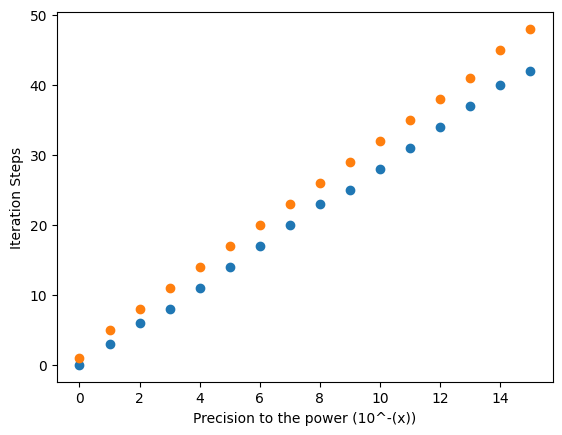

In [64]:
import matplotlib.pyplot as plt

list_temp = []
list_temp_stop = []

for i in range(0,16):
    precision = 10**(-i)

    temp = Simple_iteration(L,g.g,precision, 0)
    list_temp.append(temp[1])


    temp_stop = Stopping_Criterion(1,g.g(1),precision,L)
    list_temp_stop.append(temp_stop)
    
    




plt.scatter(np.arange(len(list_temp)),list_temp)
plt.scatter(np.arange(len(list_temp_stop)),list_temp_stop)

plt.ylabel ('Iteration Steps')
plt.xlabel ('Precision to the power (10^-(x))')

plt.show()




